Run on NERSC

In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
ccd = fitsio.read('/global/project/projectdirs/cosmo/work/legacysurvey/dr9/reorg/survey-ccds-decam-dr9-newlocs2.fits.gz')
ccd = Table(ccd)
print(len(ccd))

# Load Schlegel's CCD file list
fn = '/global/project/projectdirs/cosmo/work/users/djschleg/dr9lists/dr9c.txt'
with open(fn, 'r') as f:
    lines = list(map(str.rstrip, f.readlines()))
print(len(lines))
print(lines[0])

ccd['basename'] = list(map(os.path.basename, ccd['image_filename']))
mask = np.in1d(ccd['basename'], np.array(lines))
print(np.sum(mask)/len(mask))
ccd = ccd[mask]
print(len(ccd))

mask = np.in1d(ccd['basename'], np.array(lines))
print(np.sum(mask)/len(mask))
ccd = ccd[mask]
print(len(ccd))

3560028
2191
c4d_130902_061047_ooi_g_ls9.fits.fz
0.0371909996214
132401
1.0
132401


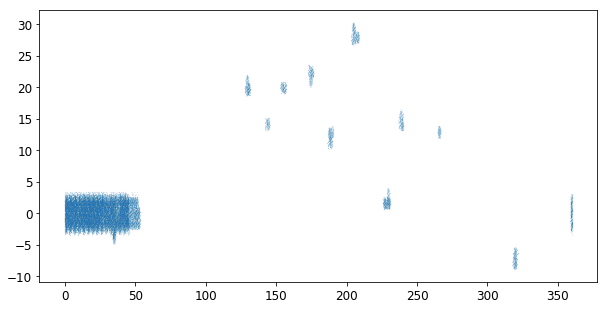

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(ccd['ra'][::5], ccd['dec'][::5], '.', ms=0.1)
plt.show()

In [6]:
mask = (ccd['expnum']==365135) & (ccd['ccdname']=='N3')
if np.sum(mask)!=1:
    raise ValueError('ERROR!')
img_idx = np.where(mask)[0][0]
ccd[img_idx]

image_filename,image_hdu,camera,expnum,plver,procdate,plprocid,ccdname,object,propid,filter,exptime,mjd_obs,airmass,fwhm,width,height,ra_bore,dec_bore,crpix1,crpix2,crval1,crval2,cd1_1,cd1_2,cd2_1,cd2_2,yshift,ra,dec,skyrms,sig1,ccdzpt,zpt,ccdraoff,ccddecoff,ccdskycounts,ccdskysb,ccdrarms,ccddecrms,ccdphrms,ccdnastrom,ccdnphotom,ccd_cuts,basename
bytes120,int16,bytes5,int64,bytes8,bytes19,bytes7,bytes3,bytes35,bytes10,bytes1,float32,float64,float32,float32,int16,int16,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,bool,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,str35
decam/CP/V4.8.2a/CP20141002/c4d_141003_075725_ooi_g_ls9.fits.fz,33,decam,365135,V4.8.2a,2019-08-11T14:46:38,954ce4a,N3,DES survey hex 292+16 tiling 1,2012B-0001,g,90.0,56933.3299043,1.37,4.92026,2046,4094,29.1652,1.629,-104.2,6306.33,29.1685378639,1.63264457616,-1.72634e-08,7.28636e-05,-7.28636e-05,-2.8377e-08,False,28.8570792887,1.55028448462,0.0723096,0.00661733,25.1078,25.099,0.0151534,-0.00730934,1.72735,23.1081,0.0330561,0.0348264,0.0331505,130,142,1,c4d_141003_075725_ooi_g_ls9.fits.fz


In [9]:
image_dir = '/global/project/projectdirs/cosmo/staging/'
fn = os.path.join(image_dir, ccd['image_filename'][img_idx])
print(fn)

/global/project/projectdirs/cosmo/staging/decam/CP/V4.8.2a/CP20141002/c4d_141003_075725_ooi_g_ls9.fits.fz


In [10]:
hdu = fits.open(fn)
# hdu.info()
# hdu[33].header

In [11]:
print(hdu[33].header)
img = hdu[33].data

XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 2046 / Axis length                                    NAXIS2  =                 4094 / Axis length                                    PCOUNT  =                    0 / No 'random' parameters                         GCOUNT  =                    1 / Only one group                                 ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        EXTNAME = 'N3      '           / Extension name                                 INHERIT =                    T / Inherits global header                         DATE    = '2019-08-11T14:47:06' / Date FITS file was generated                  IRAF-TLM= '2019-08-11T14:47:46' / Time of last modification                     WCSAXES =                    2 / WCS Dim

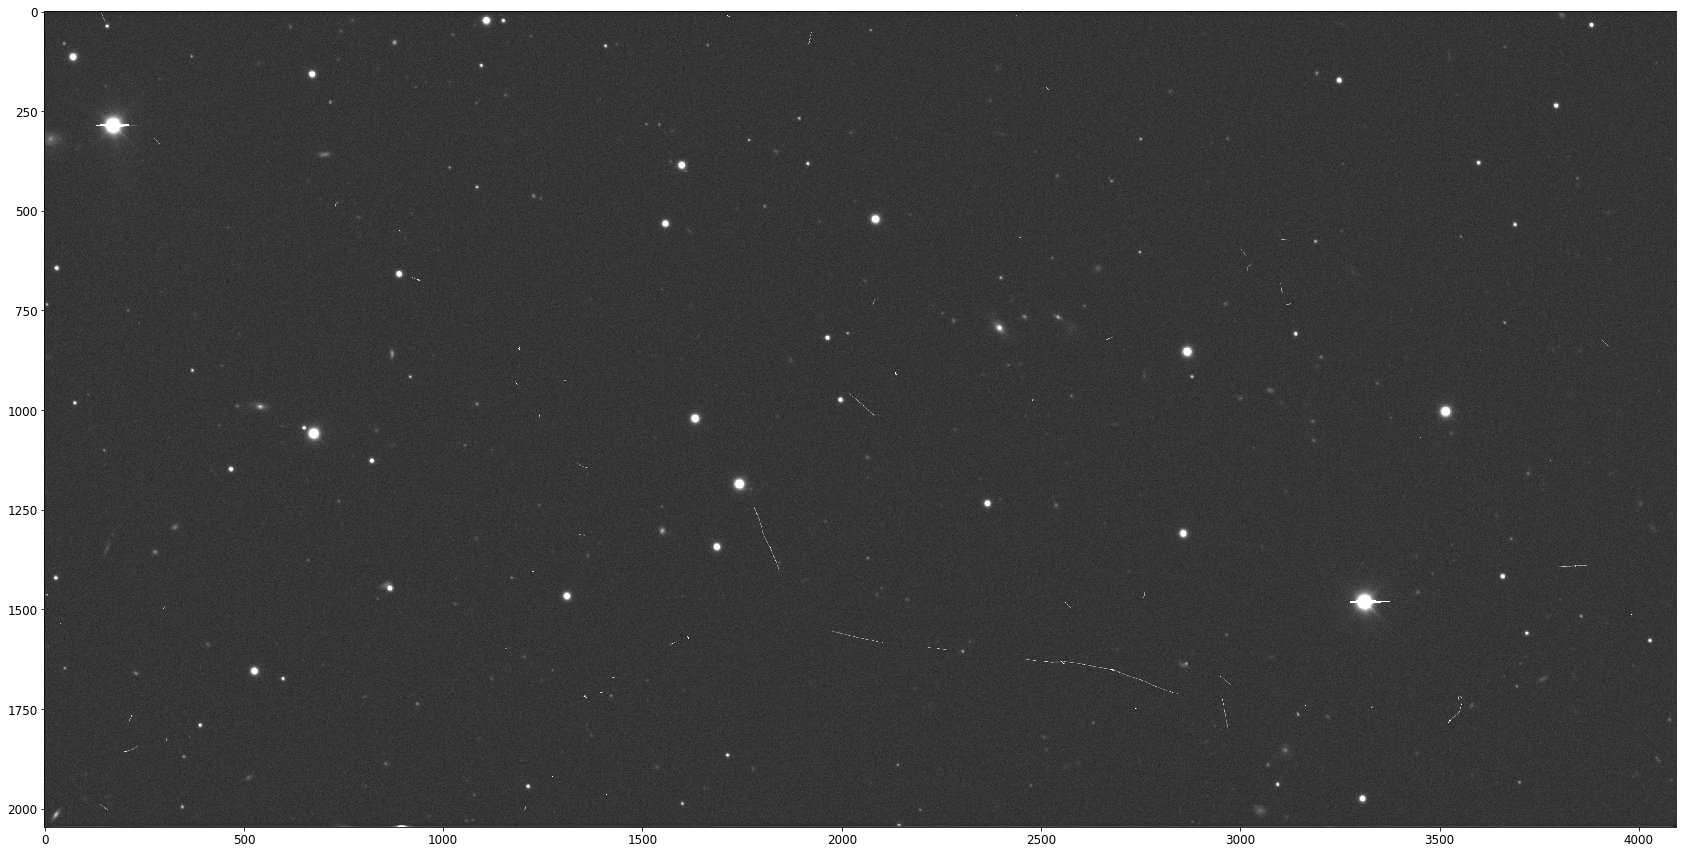

In [28]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(30, 15))
plt.imshow(img.T, norm=LogNorm(), cmap='gray', vmin=100, vmax=800)
plt.show()

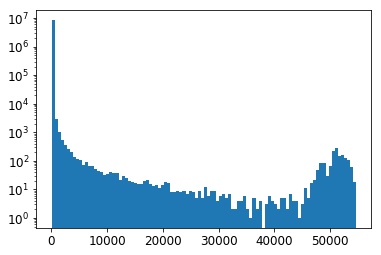

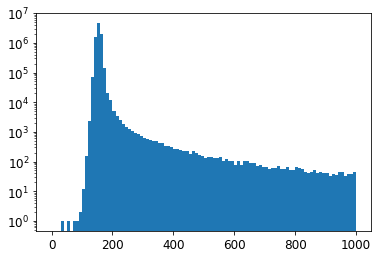

In [29]:
plt.hist(img.flatten(), 100, log=True)
plt.show()

plt.hist(img.flatten(), 100, range=(0, 1000), log=True)
plt.show()